In [38]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

# matplotlib configuration
sns.set_style(style='ticks')
sns.set_theme(style="ticks")
sns.set(rc={'figure.figsize':(11.7,8.27)})
# plt.rcParams['figure.figsize'] = 10, 7.5
# plt.rcParams['axes.grid'] = True
# plt.gray()

# pandas configuration
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 300)

In [5]:
df = pd.read_csv('Airbnb_Open_Data.csv')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (23) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [6]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,False,strict,Private room,2020.0,$966,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,False,moderate,Entire home/apt,2007.0,$142,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,True,flexible,Private room,2005.0,$620,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,True,moderate,Entire home/apt,2005.0,$368,$74,30.0,270.0,07/05/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,False,moderate,Entire home/apt,2009.0,$204,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


#### Overview of total number of rows with missing columns

In [7]:
df.isna().sum(axis=0)

id                                     0
NAME                                 250
host id                                0
host_identity_verified               289
host name                            406
neighbourhood group                   29
neighbourhood                         16
lat                                    8
long                                   8
instant_bookable                     105
cancellation_policy                   76
room type                              0
Construction year                    214
price                                247
service fee                          273
minimum nights                       409
number of reviews                    183
last review                        15893
reviews per month                  15879
review rate number                   326
calculated host listings count       319
availability 365                     448
house_rules                        52131
license                           102597
dtype: int64

#### Fill Variable - Name

In [8]:
# since it does not seem like there are any peculiarities with unnamed listings, a temporal placeholder 
#is used as it should not affect the data in any significant way
df['NAME'].fillna('Sample', inplace=True)

#### Drop Variable - License

In [9]:
# There are only two entries with a valid license, making it an extreme outlier, so it would be easier to 
# drop the selection entirely
df.drop(columns = 'license', inplace=True)

#### Fill Variable - Host Identity

In [10]:
df.loc[df['host_identity_verified'].isna()].isna().sum(axis = 1).value_counts()

1    112
2    101
3     45
4     28
5      2
6      1
dtype: int64

In [11]:
# as long as there are no extreme outliers with too many instances of information missing, it should be fine
# to simply replace the null values with the standard placeholders 
# in this case, null values and unconfirmed verification is essentially the same thing
df['host_identity_verified'].fillna('unconfirmed', inplace=True)

#### Fill Variable - Host Name

In [12]:
# again, host name is an inconsequential data that should not affect things in the grand scheme and a simple
# placeholder is put in place
df['host name'].fillna('unfilled', inplace=True)

##### Taking a look at construction year - the distribution of construction year across the data set is fairly symmetrical at 0.12

In [13]:
df_dropped.isna().sum(axis=1).value_counts()

NameError: name 'df_dropped' is not defined

Skewness:  0.17406046745138534


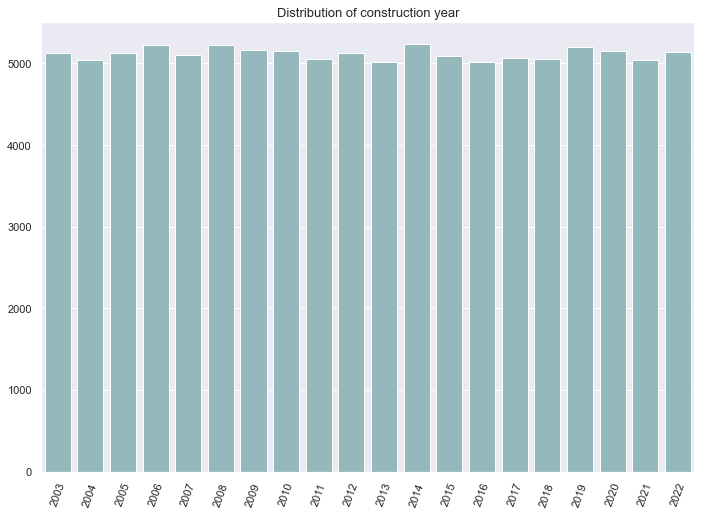

In [14]:
g = sns.barplot(
    x = df['Construction year'].value_counts().index.astype(int), 
    y = df['Construction year'].value_counts().values.astype(int),
    color = '#8dbdc2'
)
plt.xticks(rotation=70)
# plt.tight_layout()
plt.title('Distribution of construction year', fontsize = 13)

from scipy.stats import skew
print('Skewness: ' , skew(df['Construction year'].value_counts().values))

#### Overview of shape of data with missing values in associating columns

In [15]:
df.isna().sum()

id                                    0
NAME                                  0
host id                               0
host_identity_verified                0
host name                             0
neighbourhood group                  29
neighbourhood                        16
lat                                   8
long                                  8
instant_bookable                    105
cancellation_policy                  76
room type                             0
Construction year                   214
price                               247
service fee                         273
minimum nights                      409
number of reviews                   183
last review                       15893
reviews per month                 15879
review rate number                  326
calculated host listings count      319
availability 365                    448
house_rules                       52131
dtype: int64

In [16]:
target_columns = df.columns.to_list()
#since last review, review per month and house rules has larger counts of missing values, 
#they will be excluded from the selection to avoid removing too much information from the data
target_columns.remove('last review')
target_columns.remove('reviews per month')
target_columns.remove('house_rules')

In [17]:
print('Shape of data with at least one missing value in selected columns:' , 
      df[~df[target_columns].notnull().all(axis=1)].shape)
print('Shape of data outside above selection:' , 
      df[df[target_columns].notnull().all(axis=1)].shape)

Shape of data with at least one missing value in selected columns: (2262, 23)
Shape of data outside above selection: (100337, 23)


##### Going forward, we will drop 2262 values with missing values in target column to obtain cleaner data since the missing values are easier to address, effectively stripping away 2.25% of the data

In [18]:
df_filtered = df[df[target_columns].notnull().all(axis=1)].copy()
df_dropped = df[~df[target_columns].notnull().all(axis=1)].copy()

In [19]:
df_dropped.isna().sum()

id                                   0
NAME                                 0
host id                              0
host_identity_verified               0
host name                            0
neighbourhood group                 29
neighbourhood                       16
lat                                  8
long                                 8
instant_bookable                   105
cancellation_policy                 76
room type                            0
Construction year                  214
price                              247
service fee                        273
minimum nights                     409
number of reviews                  183
last review                        564
reviews per month                  548
review rate number                 326
calculated host listings count     319
availability 365                   448
house_rules                       1129
dtype: int64

In [26]:
df_dropped[(df_dropped['number of reviews'].notna()) & (df_dropped['reviews per month'].notna())]

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,instant_bookable,cancellation_policy,room type,Construction year,price,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules
15,1009621,West Village Nest - Superhost,46551725984,verified,Daniel,Manhattan,West Village,40.73530,-74.00525,True,flexible,Entire home/apt,2018.0,$578,NaN,90.0,27.0,10/31/2018,0.22,3.0,1.0,100.0,Arrival time can be no later than 9:00PM unles...
16,1010173,Only 2 stops to Manhattan studio,62566345680,unconfirmed,Heather,Brooklyn,Williamsburg,40.70837,-73.95352,NaN,moderate,Entire home/apt,2009.0,$778,NaN,2.0,148.0,6/29/2019,1.20,3.0,1.0,197.0,"Absolutely no smoking in the building, handlin..."
17,1010725,Perfect for Your Parents + Garden,80380130347,verified,Ryan,Brooklyn,Fort Greene,40.69169,-73.97185,NaN,flexible,Entire home/apt,2006.0,$656,NaN,2.0,198.0,6/28/2019,1.72,5.0,1.0,96.0,"- Please be mindful of the neighbors, quiet ti..."
18,1011277,Chelsea Perfect,73862528370,verified,Alberta,manhatan,Chelsea,40.74192,-73.99501,NaN,moderate,Private room,2008.0,$460,NaN,1.0,260.0,07/01/2019,2.12,3.0,1.0,325.0,NaN
19,1011830,Hip Historic Brownstone Apartment with Backyard,72145018858,unconfirmed,Martin,Brooklyn,Crown Heights,40.67592,-73.94694,NaN,moderate,Entire home/apt,2004.0,"$1,095",NaN,3.0,53.0,6/22/2019,4.44,5.0,1.0,345.0,LAUNDRY - Laundry can be done by the visitor b...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102252,13975415,"Spacious, Quiet, Cozy Art-Filled Chelsea Apart...",95188733152,unconfirmed,George,Manhattan,Chelsea,40.74183,-73.99878,False,flexible,Entire home/apt,2003.0,$626,$125,NaN,10.0,6/23/2019,0.72,1.0,1.0,104.0,NaN
102254,13976520,Entire apartment 2 beds/2baths with Rooftop !,65863488278,verified,Sandra,Manhattan,Harlem,40.80545,-73.95489,True,strict,Private room,2021.0,$226,$45,NaN,3.0,12/31/2017,0.12,3.0,1.0,0.0,NaN
102256,13977625,Large private room in a nice apartment,49747569066,unconfirmed,Miriam,Manhattan,Harlem,40.82634,-73.95061,True,flexible,Private room,2021.0,$125,$25,NaN,18.0,01/06/2019,0.75,5.0,1.0,179.0,NaN
102257,13978177,2bed Williamsburg Loft w Roof Access + City Views,2151054051,unconfirmed,Ashley,Brooklyn,Williamsburg,40.72059,-73.95847,True,moderate,Entire home/apt,2016.0,$538,$108,NaN,42.0,11/04/2018,1.71,1.0,1.0,0.0,No Smoking No Pets


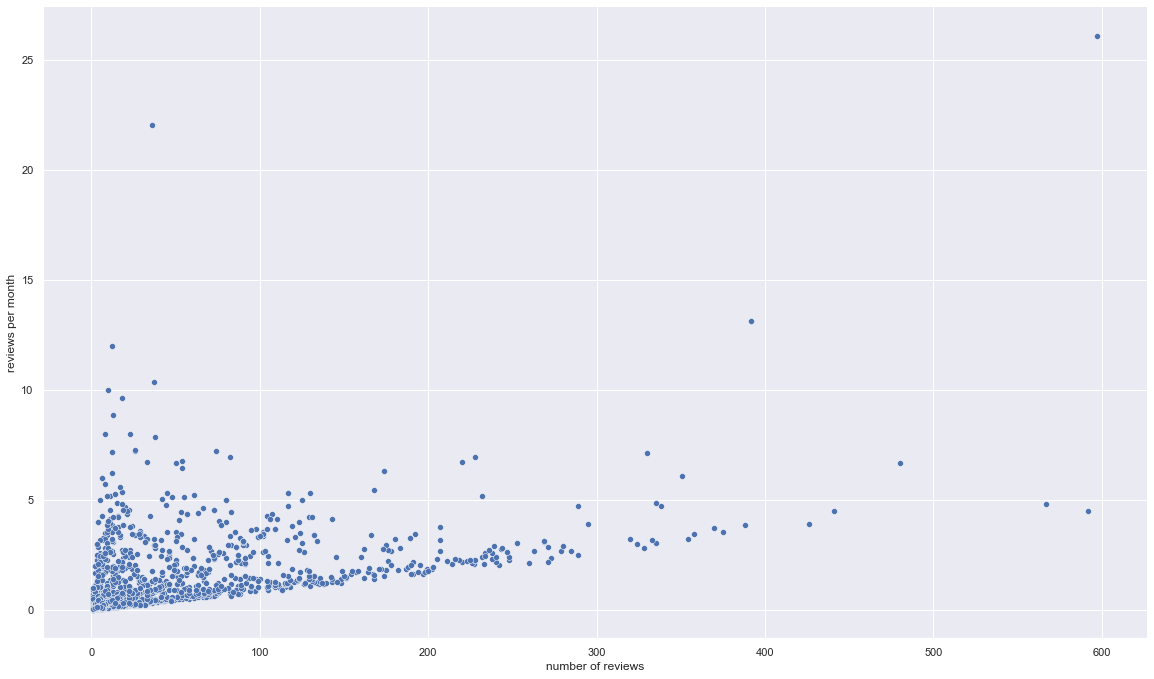

In [48]:
g = sns.relplot(data=df_dropped, x="number of reviews", y="reviews per month")
g.figure.set_size_inches(18.5, 10.5)

In [ ]:
df_dropped.describe()

In [ ]:
sns.heatmap(df_dropped.isna().T, cmap="YlGnBu",)

In [ ]:
df_dropped['missing_cols'] = df_dropped.apply(lambda x: 23 - x.count(), axis=1)
df_dropped[df_dropped['missing_cols'] >= 4]